# Swap Curve Bootstrapper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bootstrapper import *
from sample_curve import *

import calendar as cd
import math
import scipy
import warnings
import numpy as np
import pandas as pd

%matplotlib inline

In [13]:
s23 = SwapCurve(settle, 'log-linear')
for inst in s23_instruments: s23.add_inst(inst)
s23.add_knots()

stripper = CurveStripper()
s23_stripped = stripper.strip_curve(s23, interpolation='log-linear', interp_on='df')

Stripping Curve... Number of knots: 24
Stripping successful! Residual error: 1.460e-10


In [14]:
res = dict(zip(s23_stripped.knots, s23_stripped.knots_dfs))
df = pd.DataFrame({'DF':list(res.values())}, index=list(res.keys()))

df['DF_init'] = np.exp(-s23_stripped.knots_par_rates * s23_stripped.knots_taus)
df['DF_init'][0] = 1
df['DF_BBG'] = np.append(1, bbg_df)
df['ZC'] = s23_stripped.knots_zcs * 100
df['ZC_BBG'] = np.append(np.nan, bbg_zc)
df['ZC_SA'] = np.append(np.nan, s23_stripped.get_zcs(s23_stripped.knots_taus, f=2)) * 100
df['ParRates'] = s23_stripped.knots_par_rates * 100

df.head()

,DF,DF_init,DF_BBG,ZC,ZC_BBG,ZC_SA,ParRates
2020-12-03,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
2021-03-03,0.999451,0.999444,0.999430,0.222672,0.23363,0.222796,0.22538
2021-03-17,0.999360,0.999324,0.999311,0.224744,0.24435,0.224870,0.23748
2021-06-16,0.998863,0.998934,0.998794,0.213021,0.22705,0.213135,0.19972
2021-09-15,0.998381,0.998479,0.998291,0.206759,0.21903,0.206866,0.19431


In [15]:
df.tail()

,DF,DF_init,DF_BBG,ZC,ZC_BBG,ZC_SA,ParRates
2040-12-07,0.770414,0.775222,0.767290,1.302528,1.32372,1.306779,1.27146
2045-12-07,0.711924,0.717837,0.708432,1.357650,1.33790,1.362269,1.32460
2050-12-07,0.660195,0.666667,0.656393,1.382678,1.40229,1.387469,1.35019
2060-12-07,0.587931,0.591215,0.582956,1.326594,1.34828,1.331003,1.31268
2070-12-08,0.541491,0.538100,0.533850,1.225715,1.25453,1.229479,1.23827


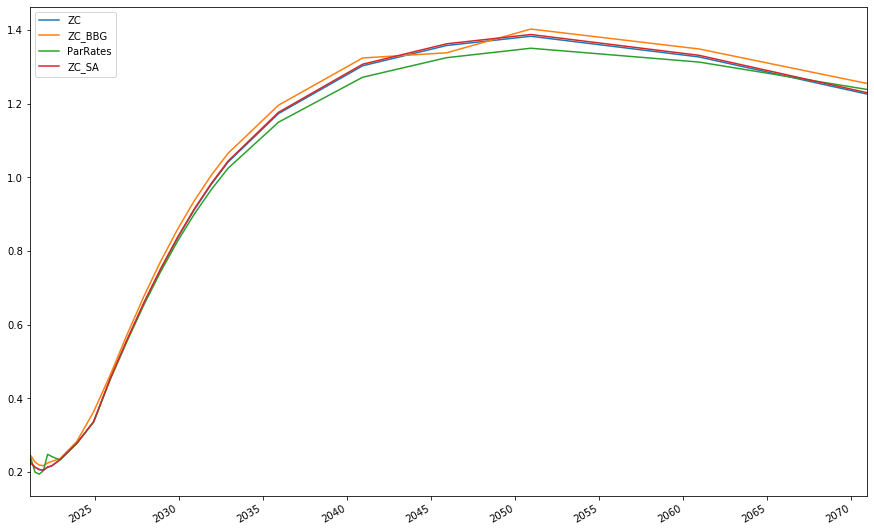

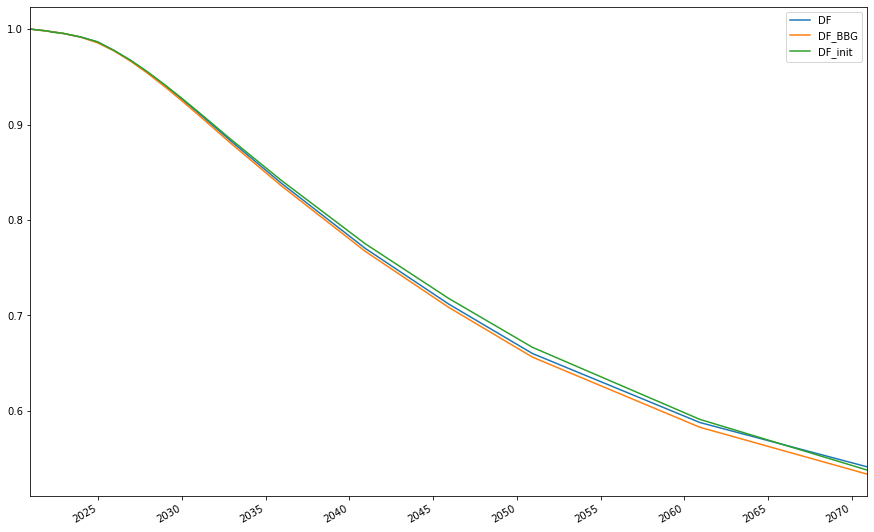

In [16]:
df[['ZC', 'ZC_BBG','ParRates','ZC_SA']][1:].plot(figsize=(15,10))
df[['DF','DF_BBG','DF_init']].plot(figsize=(15,10))

In [17]:
t_i = np.arange(0, 50, 0.5)
t_j = np.arange(0.5, 50.5, 0.5)
fwds = s23.get_fwds(t_i, t_j) * 100

fwd_df = pd.DataFrame({'FWD-LogLin':fwds},index=t_j)

In [18]:
s23_cubic = SwapCurve(settle, 'cubic')
for inst in s23_instruments: s23_cubic.add_inst(inst)
s23_cubic.add_knots()

stripper = CurveStripper()
result_cubic = stripper.strip_curve(s23_cubic, interpolation='cubic', interp_on='df')

Stripping Curve... Number of knots: 24
Stripping successful! Residual error: 1.465e-10


In [19]:
s23_cubic = SwapCurve(settle, 'linear')
for inst in s23_instruments: s23_cubic.add_inst(inst)
s23_cubic.add_knots()

stripper = CurveStripper()
result_linear = stripper.strip_curve(s23_cubic, interpolation='linear', interp_on='df')

Stripping Curve... Number of knots: 24
Stripping successful! Residual error: 1.571e-10


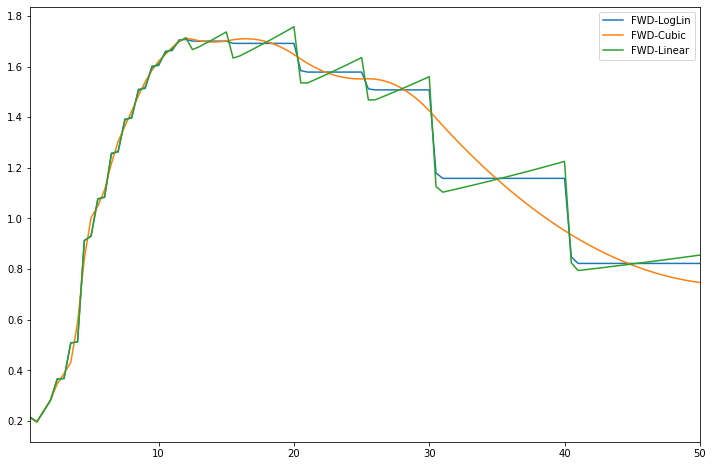

In [20]:
fwd_df['FWD-Cubic'] = result_cubic.get_fwds(t_i, t_j) * 100
fwd_df['FWD-Linear'] = result_linear.get_fwds(t_i, t_j) * 100

fwd_df.plot(figsize=(12,8))